# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [2]:
data = pd.read_csv('../D_1_10/Data/laptopData_cleaned.csv')
data.head(2)

,Company,TypeName,OpSys,RAM_GB,GPU,GPU_Brand,CPU_model,CPU_GHz,Weight_KG,Price_Rupee,ScreenRes_width,ScreenRes_height,Inches,TouchScreen,Memory_Type1,Memory_Size1_GB,Memory_Type2,Memory_Size2_GB
0,Apple,Ultrabook,macOS,8,Intel Iris Plus Graphics 640,Intel,Intel Core i5,2.3,1.37,71378.6832,2560,1600,13.3,No,SSD,128,No second memory,0
1,Apple,Ultrabook,macOS,8,Intel HD Graphics 6000,Intel,Intel Core i5,1.8,1.34,47895.5232,1440,900,13.3,No,Flash Storage,128,No second memory,0


# 1) Basic Probability: Single Events

In [3]:
p_touchscreen = (data['TouchScreen'] == 'Yes').mean()
print(f"Probability of TouchScreen: {p_touchscreen*100:.2f}%")
p_apple = (data['Company'] == 'Apple').mean()
print(f"Probability of Apple: {p_apple*100:.2f}%")
p_ram_larger_equal_16 = (data['RAM_GB'] >= 16).mean()
print(f"Probability of RAM >= 16GB: {p_ram_larger_equal_16*100:.2f}%")
p_cpu_i7 = (data['CPU_model'] == 'Intel Core i7').mean()
print(f"Probability of Intel Core i7: {p_cpu_i7*100:.2f}%")

Probability of TouchScreen: 14.56%
Probability of Apple: 1.65%
Probability of RAM >= 16GB: 17.07%
Probability of Intel Core i7: 0.31%


# 2) Joint Probability

In [4]:
# which probability have laptops are from apple to have a ssd card
p_apple_ssd = ((data['Company'] == 'Apple') & (data['Memory_Type1'] == 'SSD')).mean()
print(f"Probability of Apple with SSD: {p_apple_ssd*100:.2f}%")

Probability of Apple with SSD: 0.87%


In [5]:
# how many laptops are from dell and have touchscreen
p_dell_touchscreen = ((data['Company'] == 'Dell') & (data['TouchScreen'] == 'Yes')).mean()
print(f"Probability of Dell with TouchScreen: {p_dell_touchscreen*100:.2f}%")

Probability of Dell with TouchScreen: 4.80%


In [6]:
# gpu
p_nvidia_ram = ((data['GPU_Brand'] == 'Nvidia') & (data['RAM_GB'] >= 16)).mean()
print(f"Probability of Nvidia with RAM over 16 GB: {p_nvidia_ram*100:.2f}%")

Probability of Nvidia with RAM over 16 GB: 11.49%


# 3) Conditional Probability

In [7]:
p_touch_hp = data[data['Company'] == 'HP']['TouchScreen'].value_counts(normalize=True).get('Yes', 0)
print(f"Probability of HP with TouchScreen: {p_touch_hp * 100:.2f}%")

Probability of HP with TouchScreen: 9.40%


In [8]:
ssd = data[data['Memory_Type1'] == 'SSD']
p_sdd_price = ssd[ssd['Price_Rupee'] >= 100000]['Price_Rupee'].count() / ssd['Price_Rupee'].count()
print(f"Probability of SSD laptops over 100,000 Rupees: {p_sdd_price * 100:.2f}%")

Probability of SSD laptops over 100,000 Rupees: 20.24%


In [9]:
p_touch_hp = data[data['Company'] == 'HP']['TouchScreen'].value_counts(normalize=True).get('Yes', 0)
print(f"Probability of HP with TouchScreen: {p_touch_hp * 100:.2f}%")

Probability of HP with TouchScreen: 9.40%


# 4) Probability Distributions (empirical)

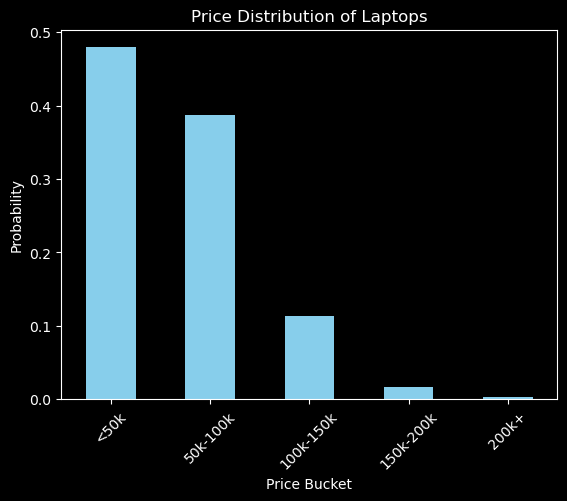

In [12]:
data['Price_bucket'] = pd.cut(data['Price_Rupee'], bins=[0, 50000, 100000, 150000, 200000, 250000], labels=['<50k',
    '50k-100k', '100k-150k', '150k-200k', '200k+'])
data['Price_bucket'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Price Distribution of Laptops')
plt.xlabel('Price Bucket')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.show()

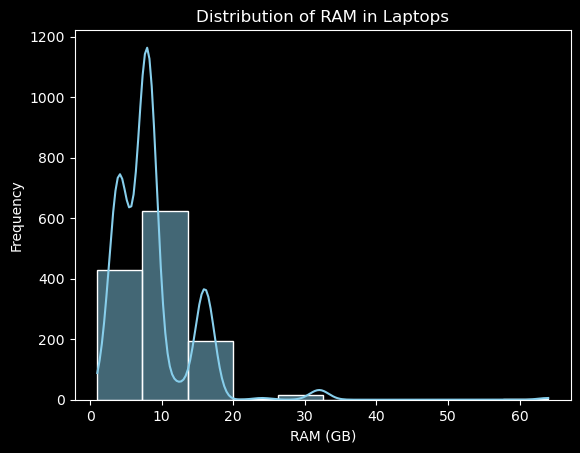

In [18]:
sns.histplot(data=data, x='RAM_GB', bins=10, kde=True, color='skyblue')
plt.title('Distribution of RAM in Laptops')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.show()

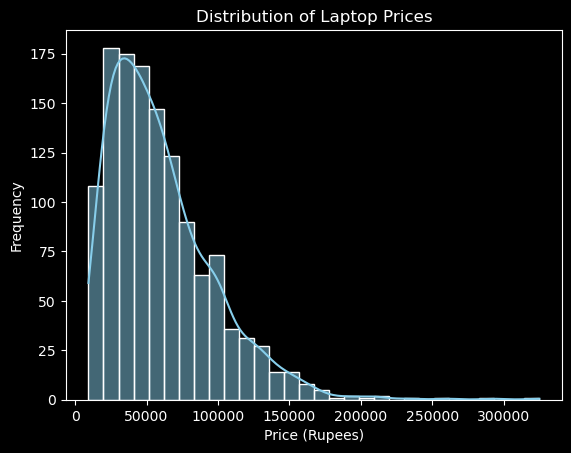

In [19]:
sns.histplot(data['Price_Rupee'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Rupees)')
plt.ylabel('Frequency')
plt.show()